In [34]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statistics
import datetime
import requests
from urllib.parse import urlencode

In [35]:
customers='https://disk.yandex.ru/d/FUi5uSd6BfG_ig'
orders='https://disk.yandex.ru/d/t9Li4JOfgxuUrg'
products='https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw'

In [36]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key_1=customers
final_url_1 = base_url + urlencode(dict(public_key=public_key_1))
response = requests.get(final_url_1)
download_url_1 = response.json()['href']

In [37]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key_2=orders
final_url_2 = base_url + urlencode(dict(public_key=public_key_2))
response = requests.get(final_url_2)
download_url_2 = response.json()['href']

In [38]:
base_url ='https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key_3=products
final_url_3 = base_url + urlencode(dict(public_key=public_key_3))
response = requests.get(final_url_3)
download_url_3 = response.json()['href']

In [40]:
customers=pd.read_csv(download_url_1, sep=',')
orders=pd.read_csv(download_url_2, sep=',')
products=pd.read_csv(download_url_3, sep=',')

In [41]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [42]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [43]:
products.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [44]:
# 1. Сколько у нас пользователей, которые совершили покупку только один раз? 

In [45]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [46]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [47]:
""" Я считаю, что стасус 'delivered' будет самым подходящем, так как при данном статусе мы точно знаем, что товар доставлен \
клиенту в полном объеме, не был потерян,что оплата была совершена, а клиент его принял.При других статусах у нас больше \
вероятность,что покупка не будет завершена полностью"""

" Я считаю, что стасус 'delivered' будет самым подходящем, так как при данном статусе мы точно знаем, что товар доставлен клиенту в полном объеме, не был потерян,что оплата была совершена, а клиент его принял.При других статусах у нас больше вероятность,что покупка не будет завершена полностью"

In [48]:
orders_delivered=orders.query("order_status=='delivered'")
orders_delivered.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [49]:
customers_id=customers[['customer_id','customer_unique_id']]

In [50]:
orders_delivered_unique_id=orders_delivered.merge(customers_id,on='customer_id',how='left')

In [51]:
orders_delivered_unique_id.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8


In [52]:
orders_delivered_unique_id.groupby('customer_unique_id', as_index=False) \
                            .agg({'order_id': 'count'})  \
                            .rename(columns={'order_id':'cnt'}) \
                            .query('cnt == 1').shape

(90557, 2)

In [53]:
# Ответ: 90557 пользователей совершили только однку покупу 

In [54]:
#2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)

In [55]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [56]:
orders['order_estimated_delivery_date_Month']=pd.to_datetime(orders.order_estimated_delivery_date).dt.to_period("M")

In [57]:
orders_not_delivery=orders.query("order_status!='delivered'")
orders_not_delivery.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_estimated_delivery_date_Month
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,2017-05
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00,2018-08


In [58]:
orders_not_delivery_status=orders_not_delivery.groupby(['order_estimated_delivery_date_Month','order_status'],as_index=False) \
    .agg({'order_id':'nunique'}) \
    .rename(columns={'order_id':'not_dilivery_cnt'}) \
    .groupby('order_status',as_index=False) \
    .agg({'not_dilivery_cnt':'mean'}) \
    .round()
orders_not_delivery_status

,order_status,not_dilivery_cnt
0,approved,1.0
1,canceled,24.0
2,created,2.0
3,invoiced,15.0
4,processing,16.0
5,shipped,48.0
6,unavailable,29.0


Text(0.5, 0, '\norder_status')

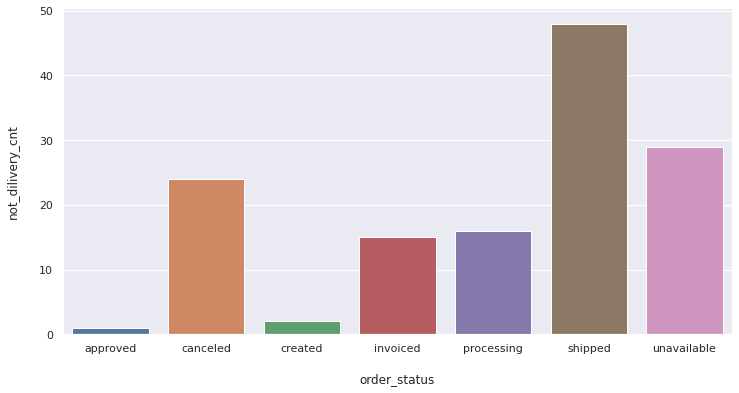

In [64]:
ax=sns.barplot(data=orders_not_delivery_status, x='order_status',y='not_dilivery_cnt')
sns.set(rc={'figure.figsize':(12,6)})
ax.set_ylabel('not_dilivery_cnt\n')
ax.set_xlabel('\norder_status')

In [65]:
""" Я считаю, что самые главные статусы canceled и unavailable, так как по дргуим статусам доставка будет осуществлена позже \
либо заявка перейдет в другой статус"""

' Я считаю, что самые главные статусы canceled и unavailable, так как по дргуим статусам доставка будет осуществлена позже либо заявка перейдет в другой статус'

In [66]:
# Ответ: По cтатусу unavailable 29 и по cтатусу canceled 24 заказов в месяц в среднем не доставляется соотвественно 

In [67]:
# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

In [68]:
orders_products=orders_delivered.merge(products,on='order_id',how='left')
orders_products.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [69]:
orders_products['day_of_the_week']=pd.to_datetime(orders_products.order_purchase_timestamp).dt.day_name()
orders_products[['day_of_the_week','product_id','order_id']].head(3)

,day_of_the_week,product_id,order_id
0,Monday,87285b34884572647811a353c7ac498a,e481f51cbdc54678b7cc49136f2d6af7
1,Tuesday,595fac2a385ac33a80bd5114aec74eb8,53cdb2fc8bc7dce0b6741e2150273451
2,Wednesday,aa4383b373c6aca5d8797843e5594415,47770eb9100c2d0c44946d9cf07ec65d


In [70]:
orders_products_day_week=orders_products.groupby(['product_id', 'day_of_the_week'],as_index=False) \
                .agg({'order_id': 'count'}) \
                .rename(columns={'order_id':'cnt'})
orders_products_day_week.head(3)

,product_id,day_of_the_week,cnt
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1


In [71]:
orders_products_day_week.pivot(index='product_id', columns='day_of_the_week', values='cnt')\
            .idxmax(axis=1) \
            .to_frame() \
            .reset_index() \
            .rename(columns={0:'most_popular_day'})

,product_id,most_popular_day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,Saturday
32212,fff81cc3158d2725c0655ab9ba0f712c,Monday
32213,fff9553ac224cec9d15d49f5a263411f,Friday
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


In [72]:
"""4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца \
может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть."""

'4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.'

In [73]:
customers_buys=orders.merge(customers, how='left', on='customer_id').query("order_status=='delivered'")
customers_buys.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_estimated_delivery_date_Month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-09,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [74]:
customers_buys_month=customers_buys.groupby(['order_purchase_timestamp', 'customer_unique_id'], as_index=False) \
                          .agg({'order_id': 'count'}) \
                          .rename(columns={'order_id': 'orders_month'})
customers_buys_month.head(3)

,order_purchase_timestamp,customer_unique_id,orders_month
0,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,1
1,2016-10-03 09:44:50,32ea3bdedab835c3aa6cb68ce66565ef,1
2,2016-10-03 16:56:50,2f64e403852e6893ae37485d5fcacdaf,1


In [75]:
customers_buys_month['week']=(pd.to_datetime(customers_buys_month.order_purchase_timestamp).dt.daysinmonth)/7
customers_buys_month.head(3)

,order_purchase_timestamp,customer_unique_id,orders_month,week
0,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,1,4.285714
1,2016-10-03 09:44:50,32ea3bdedab835c3aa6cb68ce66565ef,1,4.428571
2,2016-10-03 16:56:50,2f64e403852e6893ae37485d5fcacdaf,1,4.428571


In [76]:
customers_buys_month=customers_buys_month.assign(orders_week=customers_buys_month.orders_month/customers_buys_month.week)
customers_buys_month.head(3)

,order_purchase_timestamp,customer_unique_id,orders_month,week,orders_week
0,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,1,4.285714,0.233333
1,2016-10-03 09:44:50,32ea3bdedab835c3aa6cb68ce66565ef,1,4.428571,0.225806
2,2016-10-03 16:56:50,2f64e403852e6893ae37485d5fcacdaf,1,4.428571,0.225806


In [77]:
customers_buys_month[['customer_unique_id','orders_week']]

,customer_unique_id,orders_week
0,830d5b7aaa3b6f1e9ad63703bec97d23,0.233333
1,32ea3bdedab835c3aa6cb68ce66565ef,0.225806
2,2f64e403852e6893ae37485d5fcacdaf,0.225806
3,61db744d2f835035a5625b59350c6b63,0.225806
4,8d3a54507421dbd2ce0a1d58046826e0,0.225806
...,...,...
96206,7a22d14aa3c3599238509ddca4b93b01,0.225806
96207,5c58de6fb80e93396e2f35642666b693,0.225806
96208,7febafa06d9d8f232a900a2937f04338,0.225806
96209,b701bebbdf478f5500348f03aff62121,0.225806


In [101]:
"""""5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким \
    retention на 3й месяц."""

'""5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким     retention на 3й месяц.'

In [110]:
cohorts = orders.merge(customers, how='left', on='customer_id')
cohorts.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_estimated_delivery_date_Month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-09,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [134]:
orders.order_purchase_timestamp=pd.to_datetime(orders.order_purchase_timestamp)
cohorts['order_month']=orders.order_purchase_timestamp.dt.to_period("M")

In [150]:
cohorts.set_index('customer_unique_id', inplace=True)
cohorts['join_month'] = cohorts.groupby(level=0)['order_purchase_timestamp'].min().apply(lambda x: x.strftime('%Y-%m'))
cohorts.reset_index(inplace=True)
cohorts.insert(len(cohorts.columns), 'orders_num', 0, allow_duplicates=False)
cohorts.head()

,customer_unique_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_estimated_delivery_date_Month,customer_zip_code_prefix,customer_city,customer_state,order_month,join_month,orders_num
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,3149,sao paulo,SP,2017-10,2017-09,0
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-08,47813,barreiras,BA,2018-07,2018-07,0
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-09,75265,vianopolis,GO,2018-08,2018-08,0
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-12,59296,sao goncalo do amarante,RN,2017-11,2017-11,0
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02,9195,santo andre,SP,2018-02,2018-02,0


In [151]:
# формируем когорты
cohorts_1 = cohorts.groupby(['join_month', 'order_month']) \
                   .agg({'customer_unique_id': pd.Series.nunique, 'orders_num': pd.Series.count}) \
                   .rename(columns={'customer_unique_id': 'total_customers'})
cohorts_1.head()

total_customers  orders_num
join_month order_month                             
2016-09    2016-09                    4           4
2016-10    2016-10                  321         324
           2017-04                    1           1
           2017-07                    1           1
           2017-09                    1           1

In [152]:
def CohortPeriod(C):
    C['cohort_period'] = np.arange(len(C)) + 0
    return C
cohorts_1 = cohorts_1.groupby(level=0).apply(CohortPeriod)
cohorts_1.head()

total_customers  orders_num  cohort_period
join_month order_month                                            
2016-09    2016-09                    4           4              0
2016-10    2016-10                  321         324              0
           2017-04                    1           1              1
           2017-07                    1           1              2
           2017-09                    1           1              3

In [153]:
cohorts_1.reset_index(inplace=True)
cohorts_1.set_index(['cohort_period', 'join_month'], inplace=True)
cohorts_1.head()

order_month  total_customers  orders_num
cohort_period join_month                                         
0             2016-09        2016-09                4           4
              2016-10        2016-10              321         324
1             2016-10        2017-04                1           1
2             2016-10        2017-07                1           1
3             2016-10        2017-09                1           1

In [154]:
cohort_group_size = cohorts_1['total_customers'].groupby(level=1).first()
cohorts_1['total_customers'].unstack(0)

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
join_month,,,,,,,,,,,,,,,,,,
2016-09,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,321.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0
2017-04,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN


In [155]:
retention_rate = cohorts_1['total_customers'].unstack(0).divide(cohort_group_size, axis=0)
retention_rate

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
join_month,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,0.003115,0.003115,0.003115,0.003115,0.003115,0.003115,0.006231,0.006231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.003927,0.002618,0.001309,0.003927,0.001309,0.005236,0.001309,0.001309,0.003927,0.001309,0.007853,0.003927,0.001309,0.001309,0.002618,0.003927,0.001309
2017-02,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,0.002854,0.001712,0.001712,0.001142,0.000571,0.000571,0.002283
2017-03,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,0.003794,0.001517,0.002276,0.001138,0.001517,0.002276,0.000759,0.001517
2017-04,1.0,0.005952,0.002126,0.001701,0.003401,0.002551,0.003401,0.002976,0.002976,0.001701,0.002551,0.000850,0.000850,0.000425,0.000850,0.000850,0.002126,NaN
2017-05,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,0.002503,0.003059,0.002503,0.003337,0.002503,0.000278,0.001947,0.002503,NaN,NaN
2017-06,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,0.002230,0.001274,0.002230,0.003186,0.003504,0.001593,0.001274,0.001911,NaN,NaN,NaN


In [156]:
cohort_analysis = (retention_rate
            .style
            .set_caption('User retention by cohort') 
            .background_gradient(cmap='icefire')
            .highlight_null('white') 
            .format("{:.2%}", na_rep=""))
cohort_analysis

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
join_month,,,,,,,,,,,,,,,,,,
2016-09,100.00%,,,,,,,,,,,,,,,,,
2016-10,100.00%,0.31%,0.31%,0.31%,0.31%,0.31%,0.31%,0.62%,0.62%,,,,,,,,,
2016-12,100.00%,100.00%,,,,,,,,,,,,,,,,
2017-01,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,0.39%,0.13%,0.79%,0.39%,0.13%,0.13%,0.26%,0.39%,0.13%
2017-02,100.00%,0.23%,0.29%,0.11%,0.40%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,0.29%,0.17%,0.17%,0.11%,0.06%,0.06%,0.23%
2017-03,100.00%,0.49%,0.38%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%
2017-04,100.00%,0.60%,0.21%,0.17%,0.34%,0.26%,0.34%,0.30%,0.30%,0.17%,0.26%,0.09%,0.09%,0.04%,0.09%,0.09%,0.21%,
2017-05,100.00%,0.50%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,0.25%,0.31%,0.25%,0.33%,0.25%,0.03%,0.19%,0.25%,,
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,0.22%,0.13%,0.22%,0.32%,0.35%,0.16%,0.13%,0.19%,,,


In [ ]:
#Ответ: со значением retention rate в 0.41% самый высокий показатель у когорты '2017-06'.